## Assignment 1

### 1. Basic probability theory notation and terms

- probability
  - A value of the chance/risk that some event/outcome will occur.
- probability mass
  - For discrete events/outcomes, the value of the chance/risk that the exact event/outcome will occur.
- probability density
  - For continuous events/outcomes, a value of the chance/risk of the event/outcome that can be compared to other events/outcomes of the same distribution.
- probability mass function (pmf)
  - For discrete events/outcomes, the function that maps each possible event/outcome to the corresponding probability mass.
- probability density function (pdf)
  - For continuous events/outcomes, the function that maps each possible event/outcome to the corresponding probability density.
- probability distribution
- discrete probability distribution
- continuous probability distribution
- cumulative distribution function (cdf)
  - The cumulative sum of the distribution function, given that the events/outcomes are somehow orderable. I.e. the probability that an event/outcome or less will occur.


- sampling distribution
- observation model
- likelihood

### 2. Basic computer skills

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import beta

import matplotlib.pyplot as plt

Calculate $\alpha$ and $\beta$ based on the given formula:

In [2]:
mean = 0.2
variance = 0.01
a = mean * (mean * (1 - mean) / variance - 1)
b = a * (1 - mean) / mean
print('alpha = {:.4f}'.format(a))
print('beta  = {:.4f}'.format(b))

alpha = 3.0000
beta  = 12.0000


Define the distibution

In [3]:
dist = beta(a, b)

Plot the linear space between 0 and 1 in 100 steps:

In [4]:
x = np.linspace(0, 1, 100)
y = dist.pdf(x)

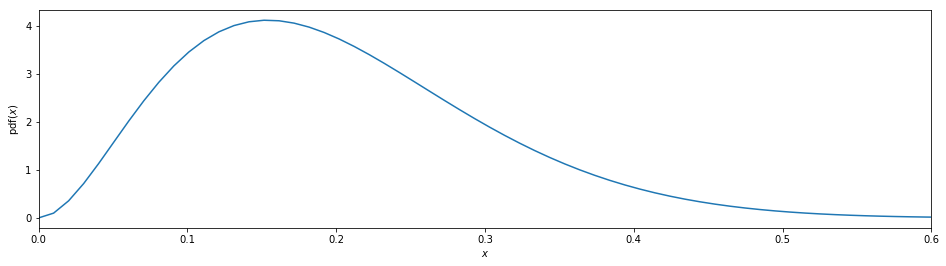

In [5]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('pdf($x$)')
ax.set_xlim(0,0.6)
plt.show()

We take 1000 random samples and plot the histogram:

In [6]:
samples = dist.rvs(size = 1000)

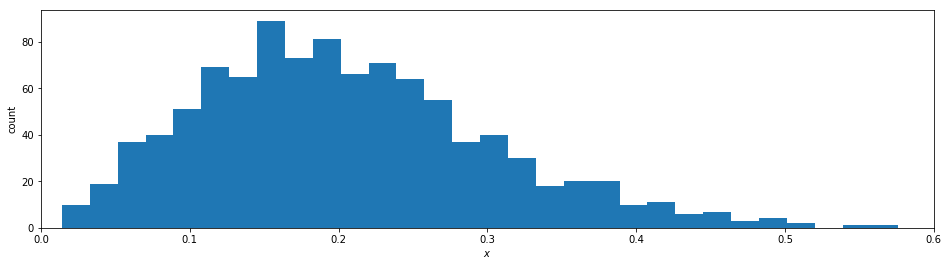

In [7]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.hist(samples, bins= 30)
ax.set_xlabel('$x$')
ax.set_ylabel('count')
ax.set_xlim(0,0.6)
plt.show()

The histogram seems to follow the original distribution as expected.

We evaluate the sample mean and variance and confirm they are approx. the true orginal values used to create the distribution:

In [8]:
print('Sample mean = {:.4f}'.format(np.mean(samples)))
print('Sample var  = {:.4f}'.format(np.var(samples)))

Sample mean = 0.2045
Sample var  = 0.0094


We compute the Central 95%-interval of the drawn sample using the 2.5% and 97.5% percentiles as bounds:

In [9]:
lwr = np.percentile(samples, q = .025)
upr = np.percentile(samples, q = .975)
print('Central 95%-interval of sample: {:.4f} - {:.4f}'.format(lwr, upr))

Central 95%-interval of sample: 0.0155 - 0.0329


### 3. Bayes' theorem I

Given that lung cancer is rare in the general population, $p(c) = 0.001$, 

$p(y = 1 | c)$

### 4. Bayes' theorem II

We have from the text:
$$p(\text{red} \; | \; \text{A}) = 2/7$$
$$p(\text{red} \; | \; \text{B}) = 4/5$$
$$p(\text{red} \; | \; \text{C}) = 1/4$$
$$p(\text{A}) = 40\%$$
$$p(\text{B}) = 10\%$$
$$p(\text{C}) = 50\%$$


Thus the probability of picking a red ball is:
$$
p(\text{red} \; | \; \text{A}) \; p(\text{A}) + 
p(\text{red} \; | \; \text{B}) \; p(\text{B}) +
p(\text{red} \; | \; \text{C}) \; p(\text{C})
\approx 31.9 \%
$$

In [10]:
p_red_A = 2/7
p_red_B = 4/5
p_red_C = 1/4
p_A = .4
p_B = .1
p_C = .5
p_red = p_red_A * p_A + p_red_B * p_B + p_red_C * p_C
print('{:.1%}'.format(p_red))

31.9%


We want to calculate $p(x \; | \; \text{red})$ for $x \in \{ \text{A}, \; \text{B}, \; \text{C} \}$ - we apply Bayes' theorem:

In [11]:
p_A_red = p_red_A * p_A / p_red
p_B_red = p_red_B * p_B / p_red
p_C_red = p_red_C * p_C / p_red
print('p_A_red = {:.1%}'.format(p_A_red))
print('p_B_red = {:.1%}'.format(p_B_red))
print('p_C_red = {:.1%}'.format(p_C_red))

p_C_red = 35.8%
p_B_red = 25.1%
p_C_red = 39.1%


From this we conclude that if we pick a red ball - it is most likely, that it came from box C.

### 5. Bayes' theorem III

We have from the text:
$$p(\text{fraternal}) = 1/125$$
$$p(\text{identical}) = 1/300$$

Since we dont know any other ways of becomming a twin we assume:
$$p(\text{twin}) = p(\text{fraternal}) + p(\text{identical})$$
$$p(\text{twin} \; | \; \text{fraternal}) = 1$$
$$p(\text{twin} \; | \; \text{identical}) = 1$$

In [12]:
p_fraternal = 1/125
p_identical = 1/300
p_twin = p_fraternal + p_identical

Since we knew Elvis were a twin, we want to calculate the following:
$$p(\text{identical} \; | \; \text{twin})$$

We apply Bayes' theorem and see that there were a 29% chance that Elvis and his death twin brother were identical twins:

In [13]:
p_identical_twin = p_identical / p_twin
print('{:.1%}'.format(p_identical_twin))

29.4%
